# Air Quality and Pollution Assessment
Environmental Metrics and Demographic Insights for Predicting Air Quality

In [101]:
import pandas as pd

In [185]:
df = pd.read_csv("updated_pollution_dataset.csv")

In [103]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [105]:
df.shape


(5000, 10)

In [9]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [106]:
df["Air Quality"].unique()

array(['Moderate', 'Good', 'Hazardous', 'Poor'], dtype=object)

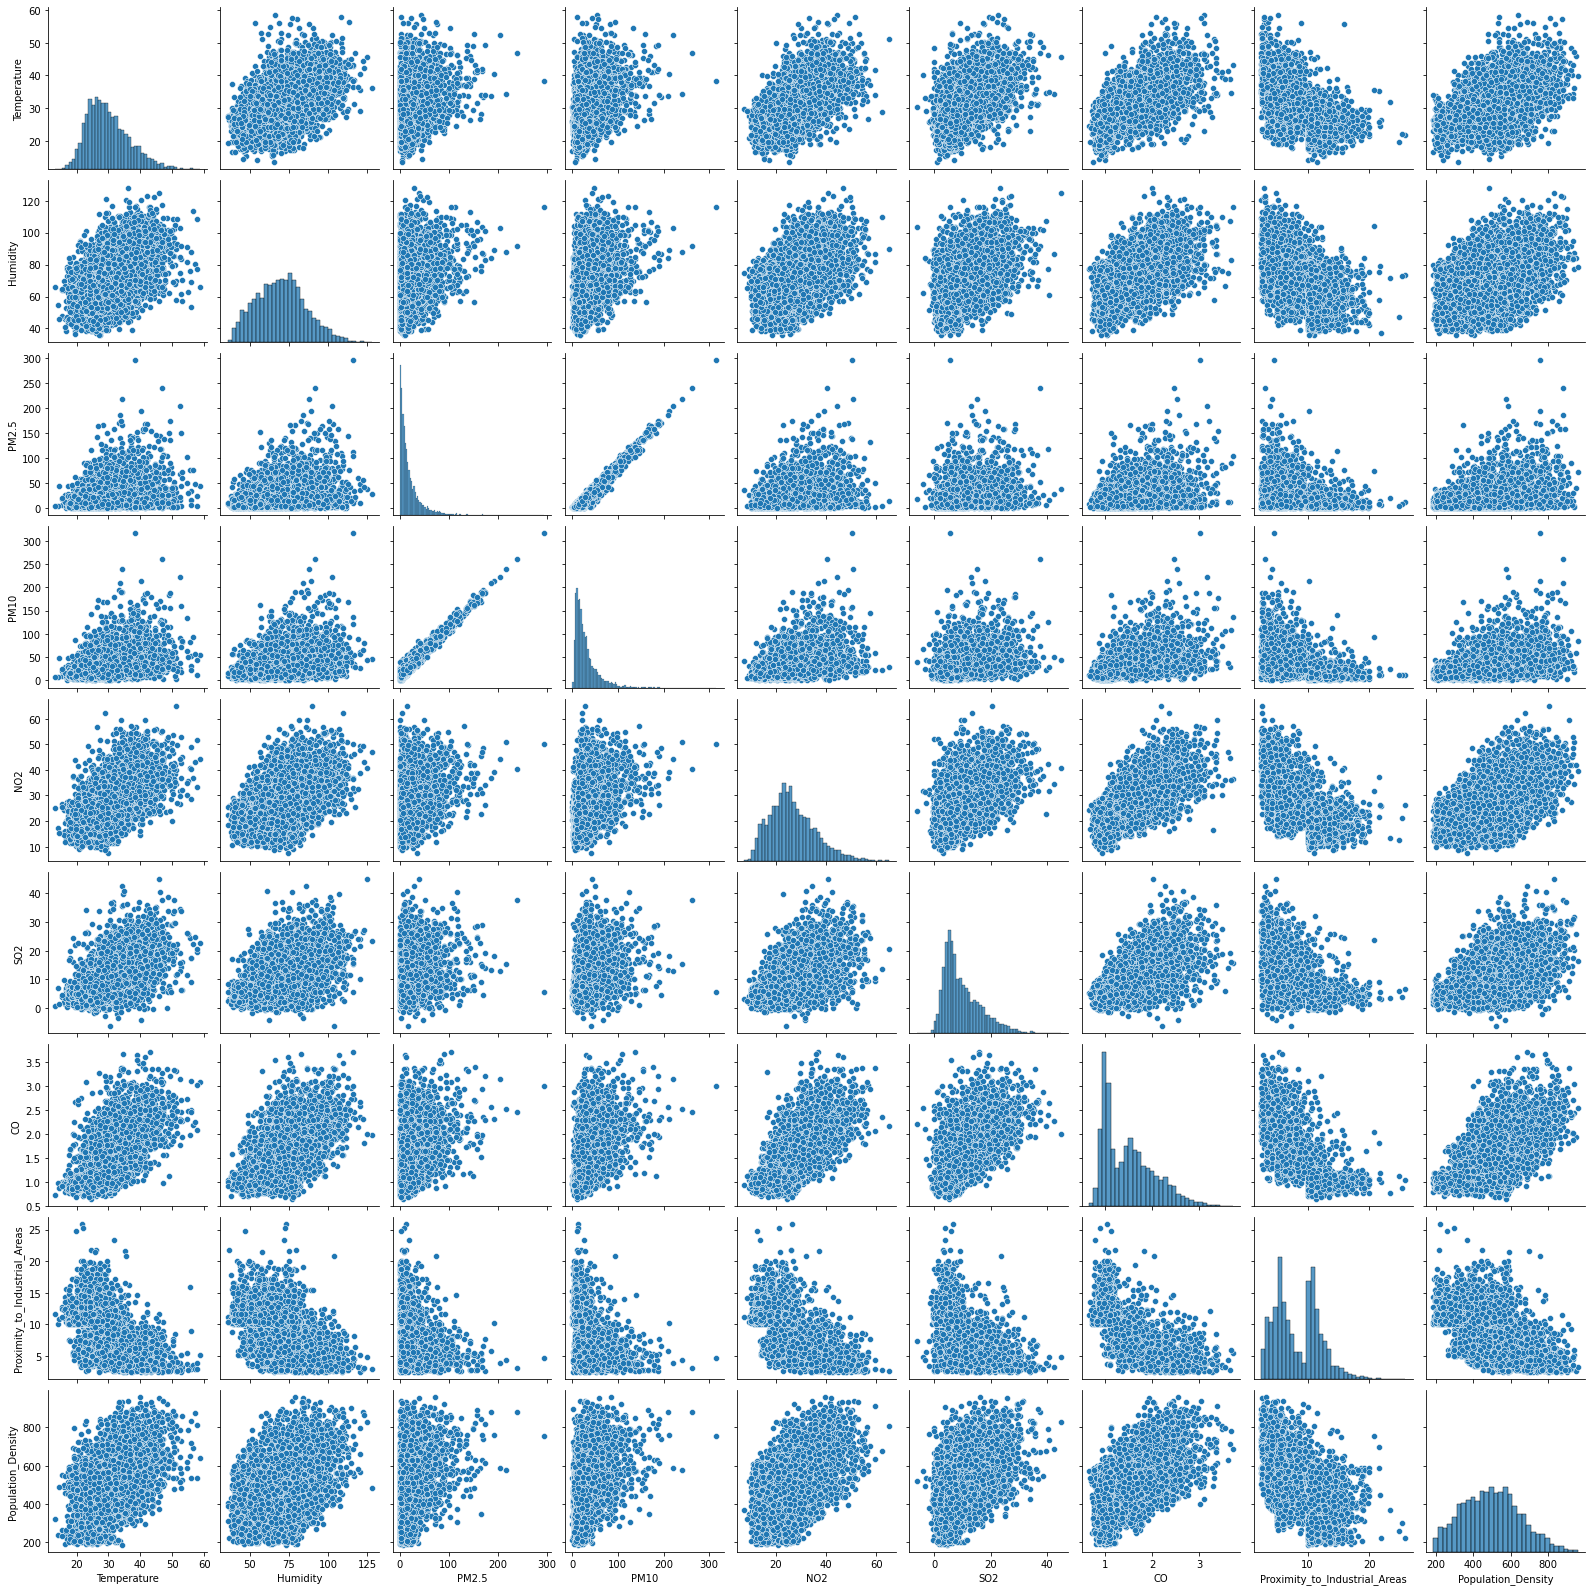

In [10]:
import seaborn as sns
sns.pairplot(df)

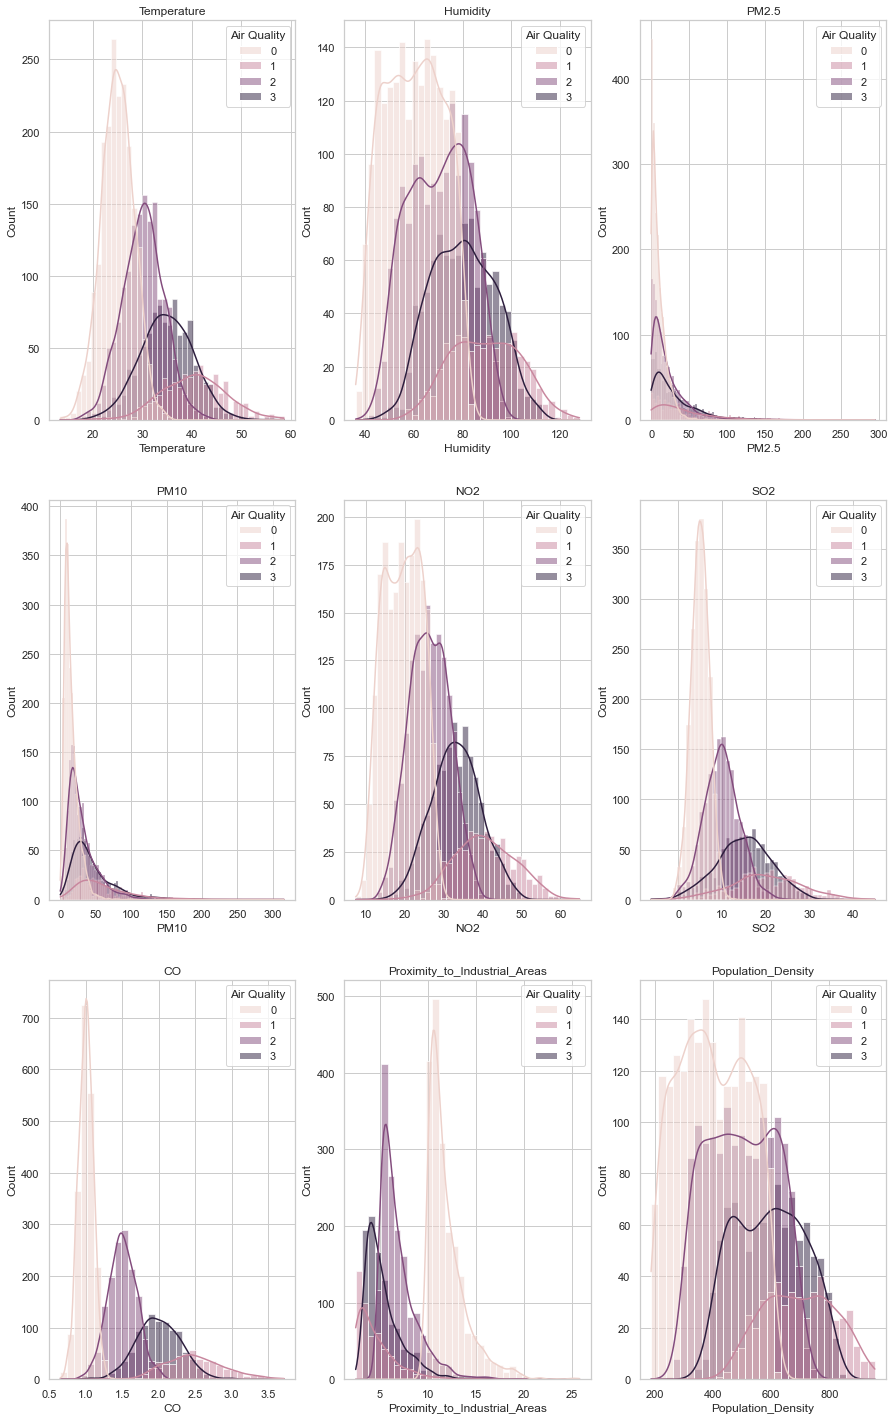

In [62]:
fig = plt.figure(figsize=(15,25))


                 
for i,col in enumerate(df.drop('Air Quality', axis=1).columns):
    plt.subplot(3,3,i+1)
    sns.histplot(x = df[col], hue=df['Air Quality'], kde=True)
    plt.title(col)

In [107]:
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [108]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

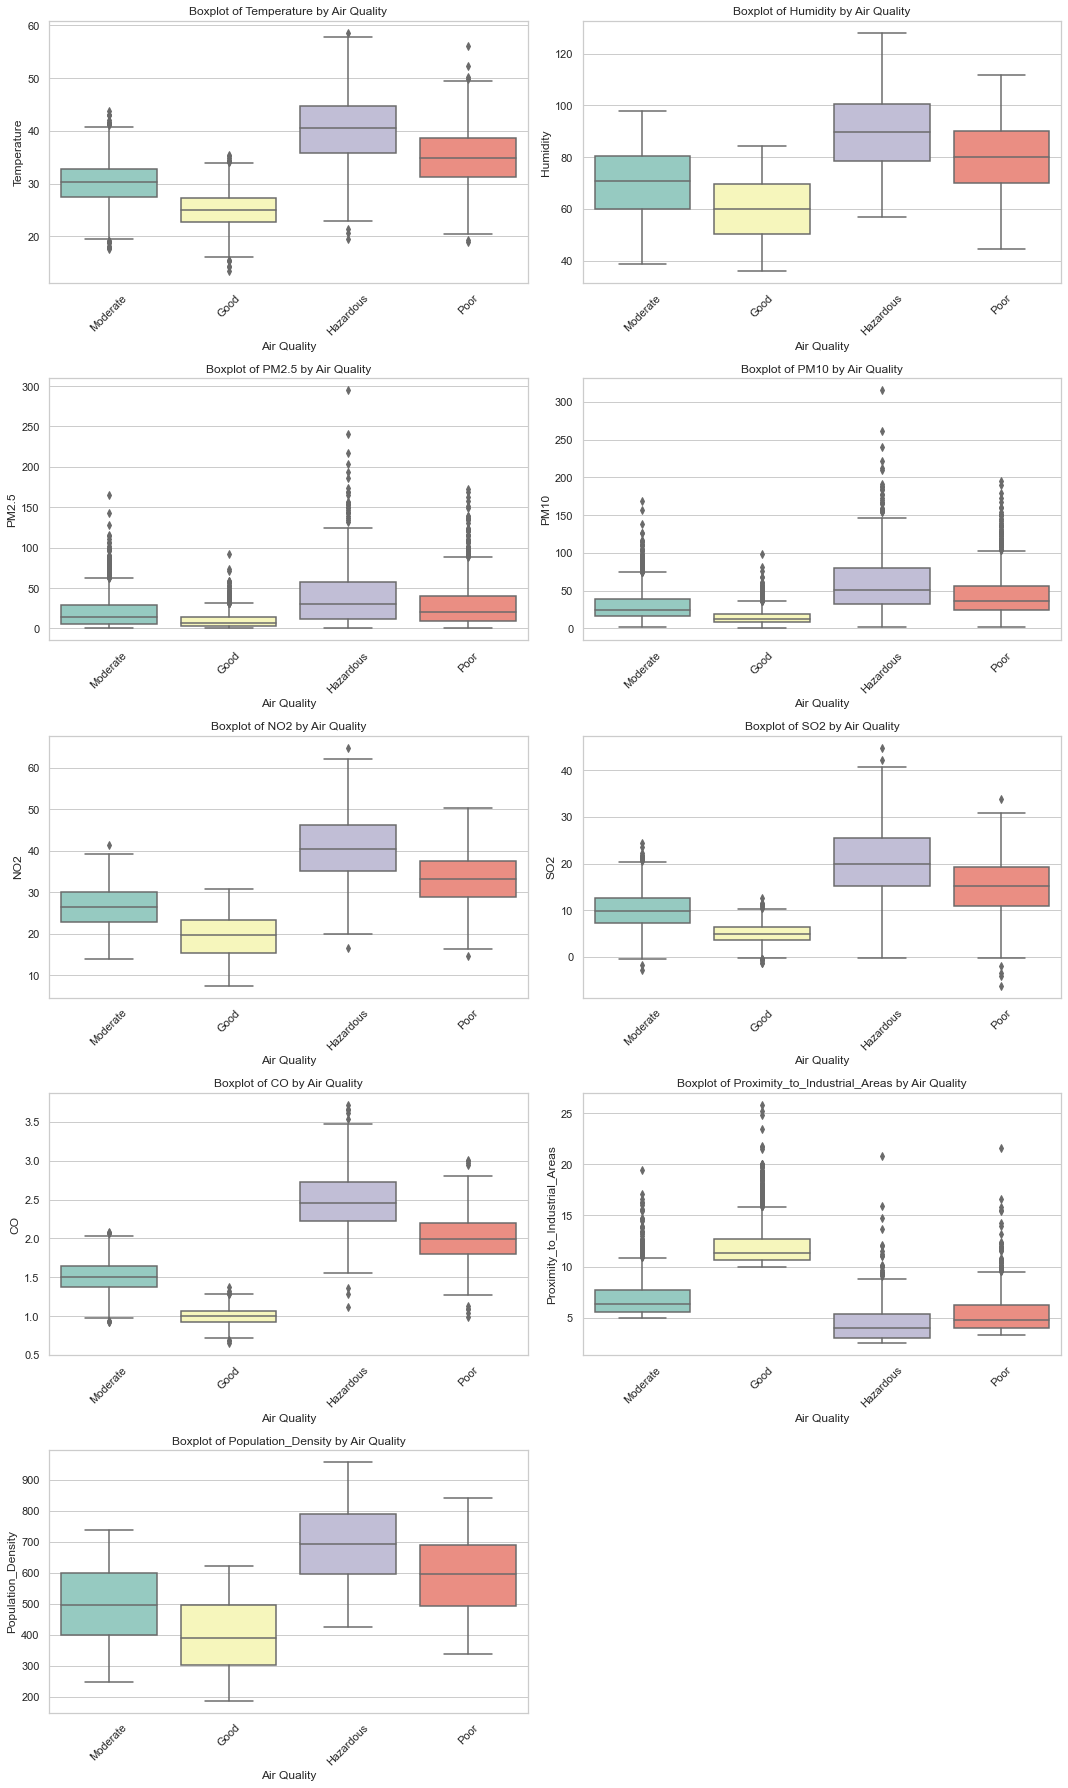

In [16]:
# Set the style of the plots
sns.set(style="whitegrid")

# 1. Boxplots for each numerical feature vs Air Quality
numerical_features = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']

plt.figure(figsize=(15, 25))
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(data=df, x='Air Quality', y=feature, palette="Set3")
    plt.title(f"Boxplot of {feature} by Air Quality")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


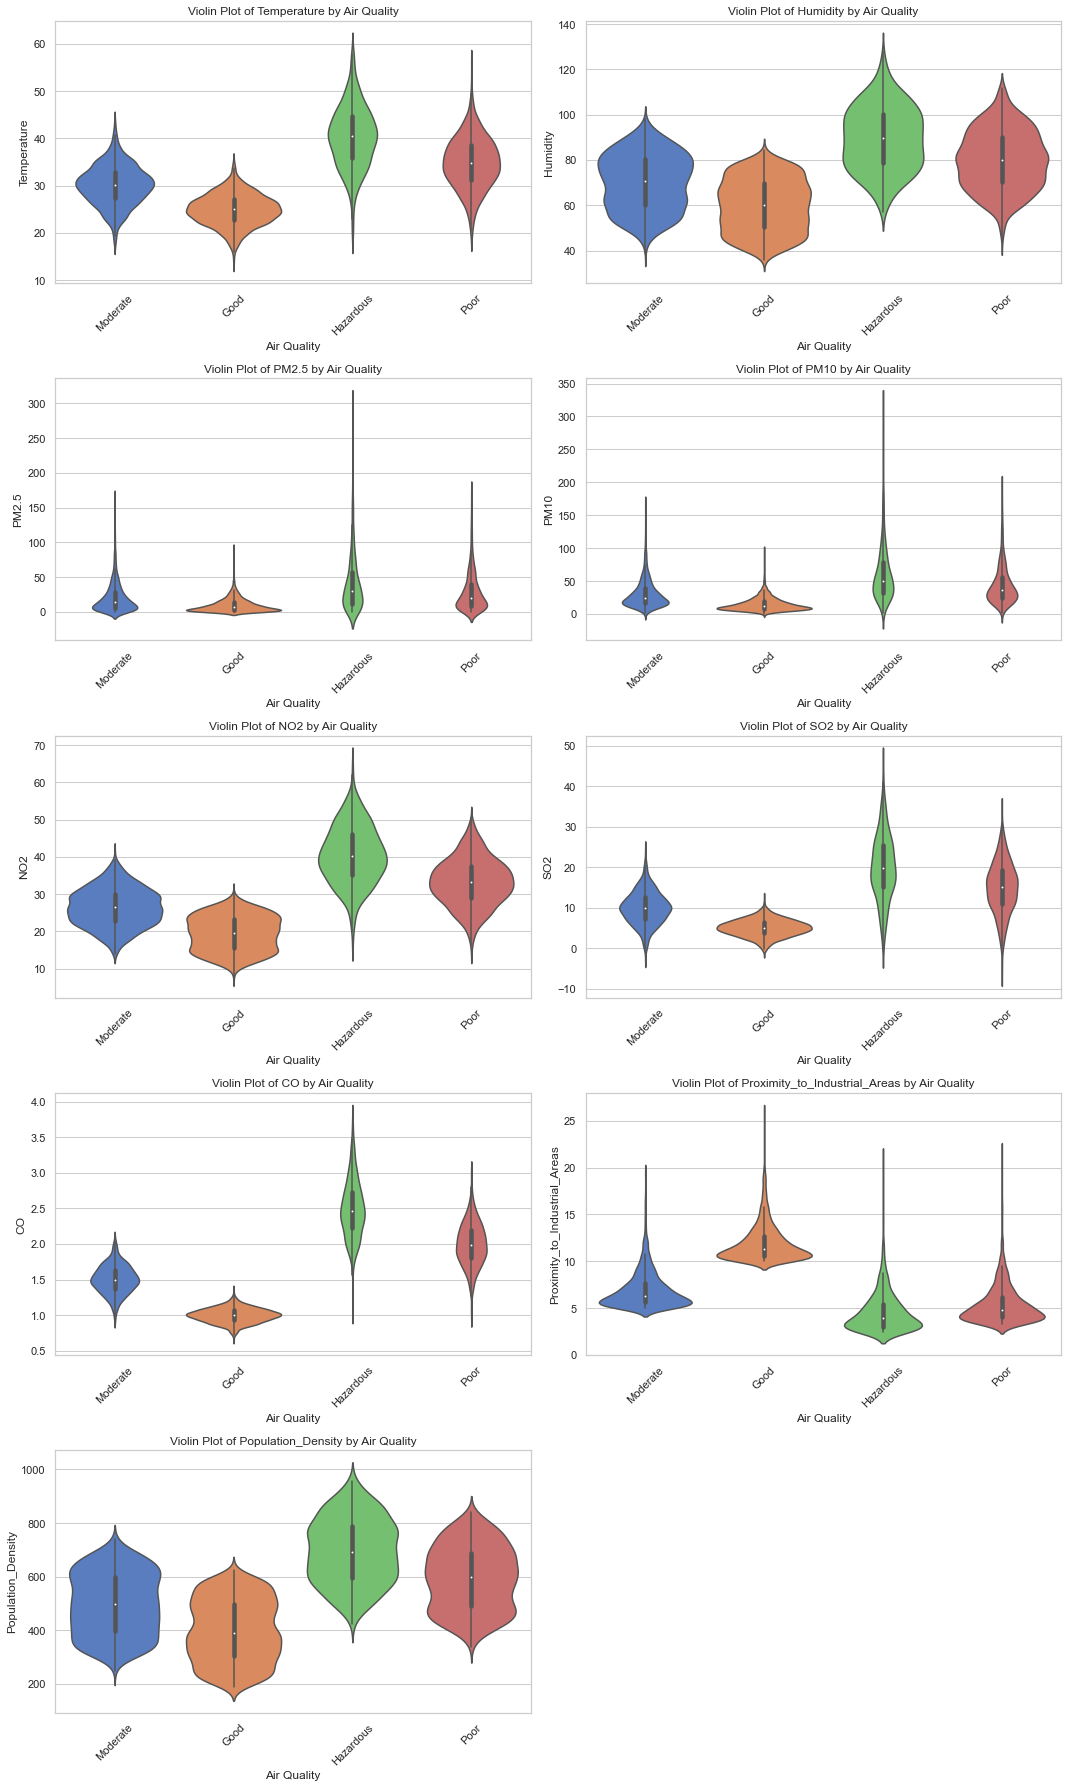

In [17]:
# 2. Violin plots for distributions
plt.figure(figsize=(15, 25))
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 2, i + 1)
    sns.violinplot(data=df, x='Air Quality', y=feature, palette="muted")
    plt.title(f"Violin Plot of {feature} by Air Quality")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

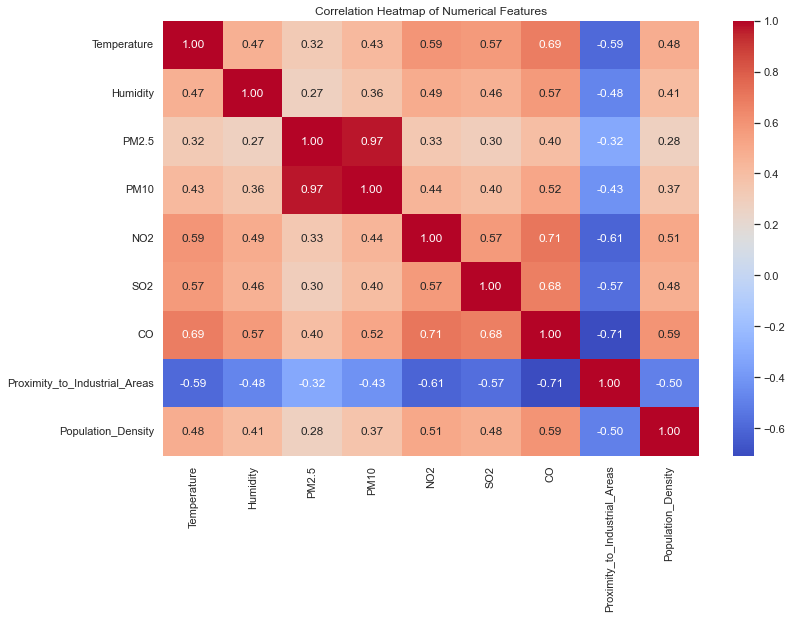

In [18]:
# 3. Heatmap of correlations between numerical features
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [186]:
#Label encoding for categorical fields
from sklearn.preprocessing import LabelEncoder

In [187]:
# Encode the target variable
le = LabelEncoder()
df['Air Quality'] = le.fit_transform(df['Air Quality'])

In [188]:
# Separate features and target
X = df.drop('Air Quality', axis=1)
y = df['Air Quality']

In [189]:
X

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303
...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241


In [190]:
# Check the mapping of labels
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print("Label Mapping:")
print(label_mapping)

Label Mapping:
{'Good': 0, 'Hazardous': 1, 'Moderate': 2, 'Poor': 3}


In [191]:
# For splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
# For scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [192]:
# Train a Random Forest Classifier for feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [140]:
# Feature importances
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

In [141]:
feature_importance_df

,Feature,Importance
6,CO,0.342478
7,Proximity_to_Industrial_Areas,0.291568
4,NO2,0.099740
5,SO2,0.087791
0,Temperature,0.068803
8,Population_Density,0.038637
1,Humidity,0.035299
3,PM10,0.023178
2,PM2.5,0.012505


In [142]:
# Select important features
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(rf, prefit=True, threshold='mean')
selected_features = X.columns[selector.get_support()]

In [143]:
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['CO', 'Proximity_to_Industrial_Areas'], dtype='object')


In [144]:
# Filter dataframe to include only selected features
X_selected = X[selected_features]

# Update dataframe for plotting
selected_df = pd.concat([X_selected, df['Air Quality']], axis=1)

In [32]:
selected_df

,CO,Proximity_to_Industrial_Areas,Air Quality
0,1.72,6.3,2
1,1.64,6.0,2
2,1.63,5.2,2
3,1.15,11.1,0
4,1.01,12.7,0
...,...,...,...
4995,2.11,2.8,1
4996,1.54,5.7,2
4997,1.63,9.6,2
4998,0.89,11.6,0


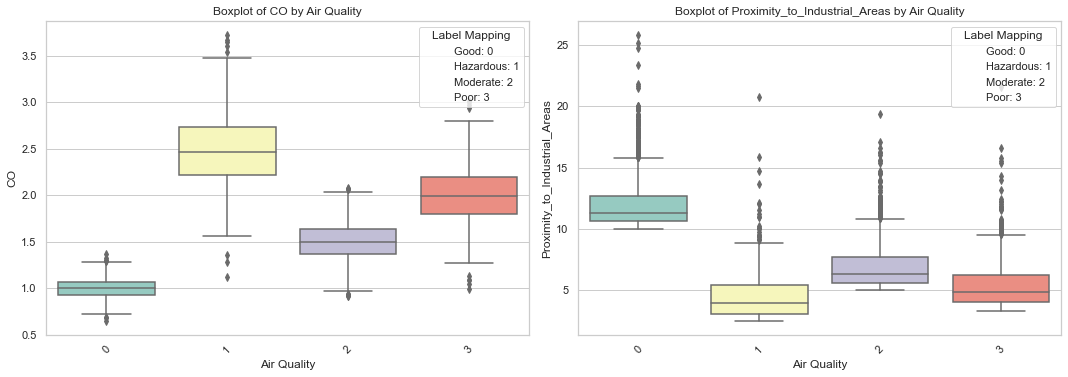

{'Good': 0, 'Hazardous': 1, 'Moderate': 2, 'Poor': 3}


In [145]:
# Set the style of the plots
import matplotlib.patches as mpatches

# Create a dictionary for label mapping
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))

sns.set(style="whitegrid")

# 1. Boxplots for each selected feature vs Air Quality
plt.figure(figsize=(15, 25))
for i, feature in enumerate(selected_features):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(data=selected_df, x='Air Quality', y=feature, palette="Set3")
    plt.title(f"Boxplot of {feature} by Air Quality")
    plt.xticks(rotation=45)
    legend_patches = [mpatches.Patch(color='none', label=f"{label}: {code}") for label, code in label_mapping.items()]
    plt.legend(handles=legend_patches, title="Label Mapping", loc='upper right')

plt.tight_layout()
plt.show()


print(label_mapping)

In [146]:
print(label_mapping)

{'Good': 0, 'Hazardous': 1, 'Moderate': 2, 'Poor': 3}


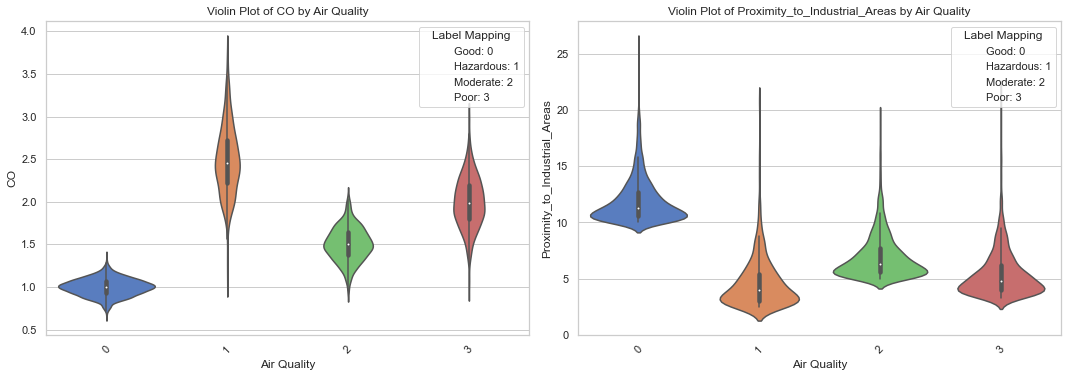

In [147]:
# 2. Violin plots for distributions
plt.figure(figsize=(15, 25))
for i, feature in enumerate(selected_features):
    plt.subplot(5, 2, i + 1)
    sns.violinplot(data=selected_df, x='Air Quality', y=feature, palette="muted")
    legend_patches = [mpatches.Patch(color='none', label=f"{label}: {code}") for label, code in label_mapping.items()]
    plt.legend(handles=legend_patches, title="Label Mapping", loc='upper right')
    plt.title(f"Violin Plot of {feature} by Air Quality")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


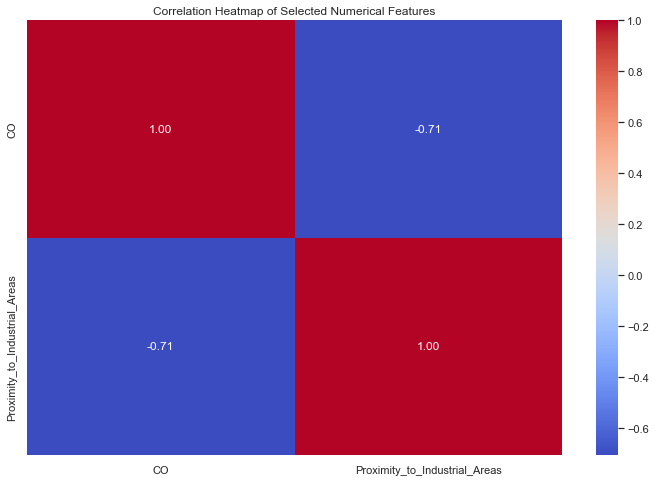

In [148]:
# 3. Heatmap of correlations between selected numerical features
correlation_matrix = selected_df[selected_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Selected Numerical Features")
plt.show()


{'Good': 0, 'Hazardous': 1, 'Moderate': 2, 'Poor': 3}


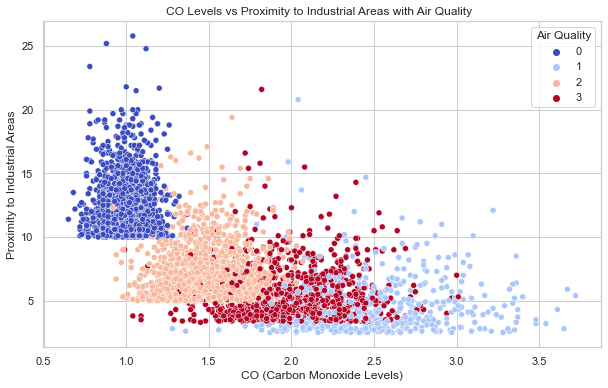

In [149]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CO', y='Proximity_to_Industrial_Areas', hue='Air Quality', palette='coolwarm')
plt.title('CO Levels vs Proximity to Industrial Areas with Air Quality  ')
plt.xlabel('CO (Carbon Monoxide Levels)')
plt.ylabel('Proximity to Industrial Areas')
plt.legend(title='Air Quality')
print(label_mapping)
plt.show()


# Correlation Analysis
To understand the strength of the relationship between CO levels, proximity to industrial areas, and air quality, calculating the correlation is important.

In [150]:
# Calculate Pearson Correlation Coefficient between CO levels and Air Quality
from scipy.stats import pearsonr
co_air_quality_corr, _ = pearsonr(df['CO'], df['Air Quality'])
print(f'Correlation between CO levels and Air Quality: {co_air_quality_corr:.2f}')

Correlation between CO levels and Air Quality: 0.62


In [151]:
# Calculate correlation between Proximity to Industrial Areas and Air Quality
proximity_air_quality_corr, _ = pearsonr(df['Proximity_to_Industrial_Areas'], df['Air Quality'])
print(f'Correlation between Proximity to Industrial Areas and Air Quality: {proximity_air_quality_corr:.2f}')


Correlation between Proximity to Industrial Areas and Air Quality: -0.72


In [193]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [153]:
# Encode the target variable (Air Quality)
label_encoder = LabelEncoder()
df['Air_Quality_Label'] = label_encoder.fit_transform(df['Air Quality'])

In [154]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,Air_Quality_Label
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0,0


In [194]:
y.unique()

array([2, 0, 1, 3])

In [195]:
X.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303


In [196]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [197]:
# Create a pipeline with scaling and classifier
model = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, random_state=42))

# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.92      0.88      0.90       111
           2       0.97      0.97      0.97       294
           3       0.88      0.90      0.89       186

    accuracy                           0.96      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000

Confusion Matrix:
 [[409   0   0   0]
 [  0  98   0  13]
 [  0   0 285   9]
 [  0   9   9 168]]


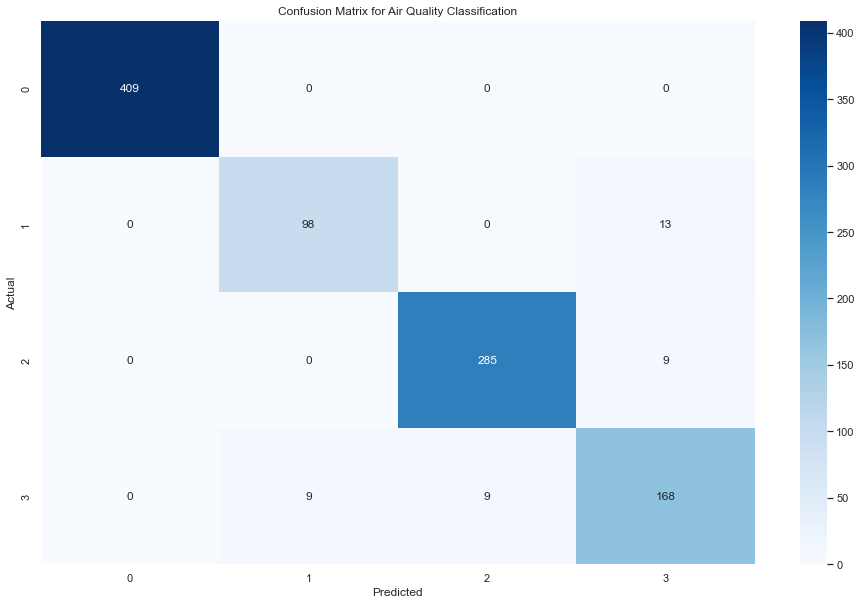

In [198]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(16, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Air Quality Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [199]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Random Forest
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 150],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 50}
Best Score: 0.9550000000000001


# Model #2 with Feature Selection

In [176]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


In [179]:
# Select relevant feature
X = df[['CO', 'Proximity_to_Industrial_Areas']]  # Features: CO, Proximity to Industrial Areas
y = df['Air Quality']  # Target: Air Quality (encoded)

In [180]:
X

,CO,Proximity_to_Industrial_Areas
0,1.72,6.3
1,1.64,6.0
2,1.63,5.2
3,1.15,11.1
4,1.01,12.7
...,...,...
4995,2.11,2.8
4996,1.54,5.7
4997,1.63,9.6
4998,0.89,11.6


In [181]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [182]:
X_train.shape

(4000, 2)

In [183]:
# Create a pipeline with scaling and classifier
model2 = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, random_state=42))

# Train the model
model2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       409
           1       0.76      0.75      0.75       111
           2       0.91      0.91      0.91       294
           3       0.73      0.73      0.73       186

    accuracy                           0.90      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.89      0.90      0.89      1000

Confusion Matrix:
 [[409   0   0   0]
 [  0  83   1  27]
 [  3   0 267  24]
 [  0  26  24 136]]


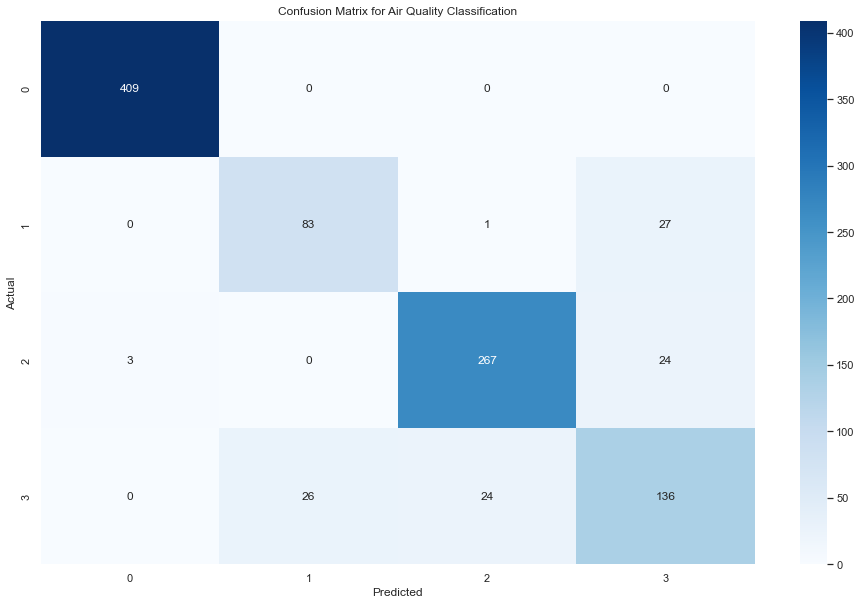

In [94]:
# Predict on the test set
y_pred2 = model2.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

# Visualize the confusion matrix
plt.figure(figsize=(16, 10))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Air Quality Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model Tunning Using Grid Search

In [184]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Random Forest
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 150],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 150}
Best Score: 0.9055
